
<div style="text-align: left"><img src="https://encrypted-tbn0.gstatic.com/images?q=tbn:ANd9GcTBPtuRucr_9WOZ-DOIie_vrhYHmihX_mvQOw&usqp=CAU" width="600" /></div>

**Docentes:** Verónica Barraza y Diego Frigerio
![orange-divider](https://user-images.githubusercontent.com/7065401/98619088-44ab6000-22e1-11eb-8f6d-5532e68ab274.png)

# Predicting Used Car Prices: A Data Science Exploration

## Introduction

Welcome to this interactive exploration in our Jupyter notebook where we will traverse the intricate landscape of used car prices. As data scientists, our task is to scrutinize, analyze, and interpret complex datasets, teasing out the hidden patterns and underlying structures within the data.

In this notebook, we'll dive into a dataset that captures a diverse spectrum of used car features along with their associated prices. From brand, model, and age to more granular details like mileage and condition, this dataset provides an exciting opportunity to investigate the multifaceted world of used cars.

Our objective here is twofold. Firstly, we aim to gain a deep understanding of our data - its characteristics, distributions, and inherent relationships. Secondly, we aspire to leverage this understanding to build a predictive model that can accurately estimate the price of a used car based on its features.

This journey will involve a variety of techniques and processes central to the field of data science, including but not limited to:

- **Data Understanding and Exploration:** Through Exploratory Data Analysis (EDA), we will familiarize ourselves with the dataset, identify patterns, and generate hypotheses about potential relationships in the data.

- **Data Preparation:** We will clean the data, handle missing values, and perform necessary transformations to prepare it for modeling. This step may also include feature engineering, where we create new variables from existing ones to enhance our model's predictive power.

- **Modeling:** We'll apply suitable machine learning algorithms to the data to construct a predictive model. We will iterate over different models, tune hyperparameters, and assess their performance to select the best model.

- **Evaluation and Validation:** The performance of our model will be evaluated using suitable metrics and validation techniques to ensure its reliability and robustness.

It's essential to remember that data science is not a linear process, but rather an iterative one. Throughout our journey, we may loop back to earlier steps based on what we learn from subsequent stages.

So, without further ado, let's dive into this data science expedition, and uncover the story that lies within our used car prices dataset!

In [1]:
from platform import python_version

print(python_version())

3.11.5


In [1]:
from platform import python_version

print(python_version())

3.8.11


In [2]:
#unicamente para ejecutar en Google Colab
from google.colab import drive
drive.mount('/content/drive')

ModuleNotFoundError: No module named 'google.colab'

In [2]:
import numpy as np
import pandas as pd

Let's read the data

In [3]:
df = pd.read_csv('/content/drive/MyDrive/used_cards_apr_2023_class.csv')

In [4]:
df.head()

,accidents_or_damage,one_owner,personal_use_only,manufacturer,transmission,drivetrain,fuel_type,interior_color,year,mileage,mpg,driver_reviews_num,seller_rating,driver_rating,price
0,0,1,1,Ford,10-Speed Automatic,four_weel_drive,Gasoline,Black Onyx,2023,1012.0,NaN,0.0,4.9,NaN,110795.0
1,0,1,0,Chrysler,9-Speed Automatic,four_weel_drive,Gasoline,Black,2019,73925.0,23.5,86.0,4.5,4.7,24063.0
2,1,0,0,BMW,8-Speed Automatic,all_weel_drive,Gasoline,NaN,2012,101698.0,19.5,8.0,3.3,4.7,18999.0
3,0,1,0,Hyundai,8-Speed Automatic,four_weel_drive,Gasoline,Dark Gray,2021,42777.0,32.0,46.0,NaN,4.8,27498.0
4,0,1,1,GMC,Automatic,all_weel_drive,Gasoline,Light Titanium,2015,113327.0,19.5,123.0,NaN,4.6,14999.0


We can check first the null values

In [5]:
df.isnull().sum()/len(df)

accidents_or_damage    0.000000
one_owner              0.000000
personal_use_only      0.000000
manufacturer           0.000000
transmission           0.012967
drivetrain             0.028963
fuel_type              0.030313
interior_color         0.074550
year                   0.000000
mileage                0.000693
mpg                    0.186563
driver_reviews_num     0.000000
seller_rating          0.280283
driver_rating          0.041677
price                  0.000000
dtype: float64

Then, another thing is always to take a look at the dataset, to get an idea of what the features are like, and what it looks like.

In [ ]:
df.sample(10)

,accidents_or_damage,one_owner,personal_use_only,manufacturer,transmission,drivetrain,fuel_type,interior_color,year,mileage,mpg,driver_reviews_num,seller_rating,driver_rating,price
297147,1,1,1,Hyundai,Automatic CVT,four_weel_drive,Gasoline,Gray,2020,10916.0,35.0,139.0,4.3,4.7,19731.0
296969,0,1,1,Kia,6-Speed Automatic,all_weel_drive,Gasoline,NaN,2017,70702.0,23.0,397.0,4.5,4.8,18808.0
202859,0,0,0,Subaru,CVT Transmission,all_weel_drive,Gasoline,NaN,2020,19000.0,NaN,34.0,NaN,4.7,21900.0
209398,1,1,1,Kia,Automatic CVT,four_weel_drive,Gasoline,Black,2020,31068.0,34.5,89.0,4.7,4.7,20105.0
235459,0,0,0,Chrysler,Automatic,four_weel_drive,E85 Flex Fuel,Black,2014,99550.0,21.0,127.0,NaN,4.6,9995.0
24182,0,0,0,Mercedes-Benz,7-Speed A/T,real_weel_drive,Gasoline,Gray,2016,52750.0,NaN,5.0,NaN,4.9,46750.0
112846,0,0,1,Dodge,8-Speed Automatic,real_weel_drive,Gasoline,Black,2021,22794.0,19.0,26.0,4.6,4.9,35844.0
21006,1,0,0,RAM,8-Speed Automatic,four_weel_drive,Gasoline,Black,2019,81648.0,18.0,143.0,4.5,4.7,29000.0
210189,0,1,0,Volkswagen,8-Speed Automatic,NaN,NaN,Titan Black Cloth,2021,44127.0,NaN,24.0,4.9,4.4,21888.0
223342,1,0,1,Chrysler,9-Speed Automatic,four_weel_drive,E85 Flex Fuel,Black,2018,115027.0,23.5,227.0,3.2,4.7,17000.0


## Exploratory Data Analisys - EDA

First, some easy checks to inspect the values

In [6]:
df.describe().T.applymap('{:.2f}'.format)

,count,mean,std,min,25%,50%,75%,max
accidents_or_damage,300000.00,0.22,0.42,0.00,0.00,0.00,0.00,1.00
one_owner,300000.00,0.54,0.50,0.00,0.00,1.00,1.00,1.00
personal_use_only,300000.00,0.64,0.48,0.00,0.00,1.00,1.00,1.00
year,300000.00,2017.79,5.09,1917.00,2016.00,2019.00,2021.00,2023.00
mileage,299792.00,55768.72,43680.79,0.00,23211.75,45566.00,78504.25,1119067.00
mpg,244031.00,24.58,6.52,0.00,21.00,24.00,28.00,127.50
driver_reviews_num,300000.00,89.43,115.03,0.00,13.00,51.00,119.00,1025.00
seller_rating,215915.00,4.16,0.81,1.00,3.80,4.50,4.70,5.00
driver_rating,287497.00,4.62,0.28,1.00,4.50,4.70,4.80,5.00
price,300000.00,35986.70,1825937.85,1.00,19595.00,27990.00,39498.00,1000000000.00


In [7]:
df.select_dtypes(include='object').describe().T

,count,unique,top,freq
manufacturer,300000,30,Ford,31327
transmission,296110,839,6-Speed Automatic,58227
drivetrain,291311,3,four_weel_drive,159600
fuel_type,290906,30,Gasoline,253799
interior_color,277635,3163,Black,112808


The most striking thing is undoubtedly the enormous dispersion in the price, our "main" variable. It seems to have some incorrectly loaded or erroneous values (especially due to that value of 1,000,000,000).

Let's check the tail of the distribution

In [8]:
print(f"Percentil 95: {np.percentile(df['price'], q=95)}")
print(f"Percentil 99: {np.percentile(df['price'], q=99)}")
print(f"Percentil 99.3: {np.percentile(df['price'], q=99.3)}")
print(f"Percentil 99.5: {np.percentile(df['price'], q=99.5)}")
print(f"Percentil 99.8: {np.percentile(df['price'], q=99.8)}")
print(f"Percentil 99.9: {np.percentile(df['price'], q=99.9)}")

Percentil 95: 68988.0
Percentil 99: 110688.05000000005
Percentil 99.3: 125575.34999999916
Percentil 99.5: 139999.0
Percentil 99.8: 199699.20199999784
Percentil 99.9: 245000.0


Now, if we filter the dataset, we see

In [9]:
upper_limit = np.percentile(df['price'], q=99.5)

df[df['price']<upper_limit].describe().T.applymap('{:.2f}'.format)

,count,mean,std,min,25%,50%,75%,max
accidents_or_damage,298496.00,0.22,0.42,0.00,0.00,0.00,0.00,1.00
one_owner,298496.00,0.54,0.50,0.00,0.00,1.00,1.00,1.00
personal_use_only,298496.00,0.64,0.48,0.00,0.00,1.00,1.00,1.00
year,298496.00,2017.79,5.05,1917.00,2016.00,2019.00,2021.00,2023.00
mileage,298290.00,56001.43,43621.85,0.00,23483.25,45818.00,78742.50,1119067.00
mpg,243127.00,24.61,6.51,0.00,21.00,24.00,28.00,127.50
driver_reviews_num,298496.00,89.85,115.16,0.00,14.00,51.00,119.00,1025.00
seller_rating,214940.00,4.16,0.81,1.00,3.80,4.50,4.70,5.00
driver_rating,286631.00,4.62,0.28,1.00,4.50,4.70,4.80,5.00
price,298496.00,31680.93,18255.34,1.00,19500.00,27955.00,39000.00,139998.00


In [10]:
df[df['price']<upper_limit].select_dtypes(include='object').describe().T

,count,unique,top,freq
manufacturer,298496,30,Ford,31280
transmission,294644,836,6-Speed Automatic,58224
drivetrain,289901,3,four_weel_drive,159490
fuel_type,289459,29,Gasoline,252506
interior_color,276245,3093,Black,112131


We still see a very high dispersion, so we can plot to understand a little more. Even though we're only looking at the price, remember that it's our main variable.

In [11]:
import matplotlib.pyplot as plt
import seaborn as sns

Plot the main variable distribution

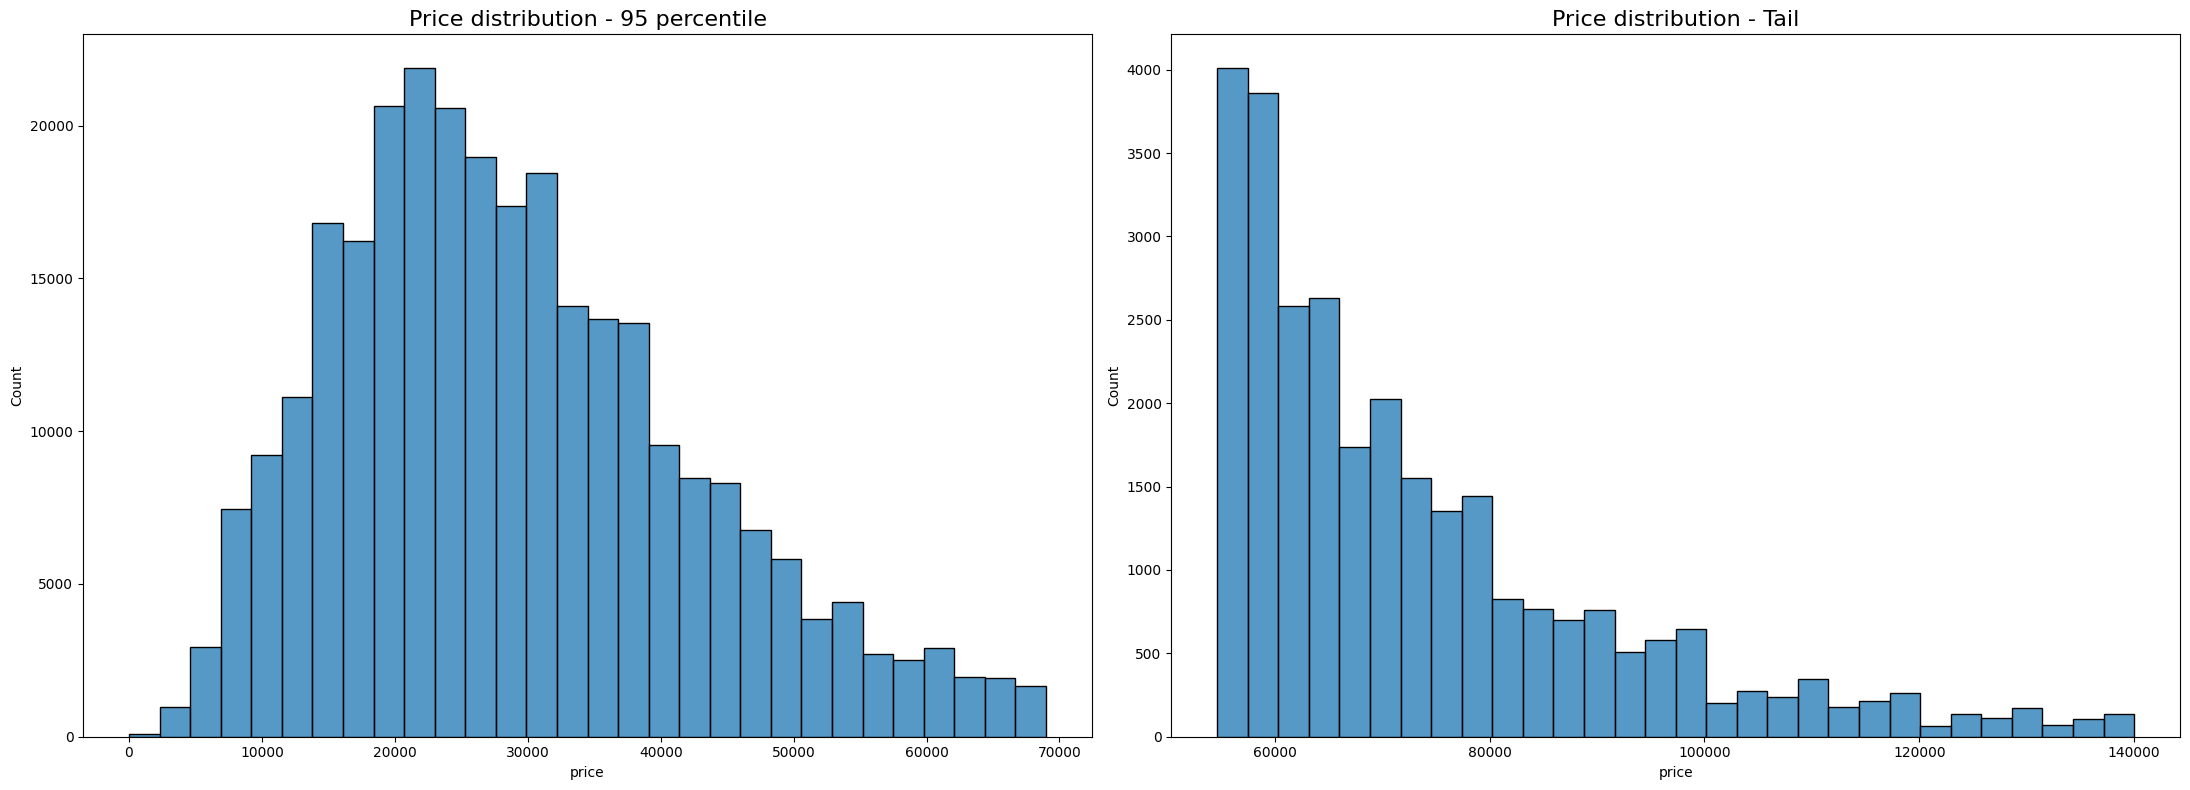

In [12]:
price_90 = np.percentile(df['price'], q=90)
price_95 = np.percentile(df['price'], q=95)

data_95 = df.loc[df['price']<price_95, ['price']]
data_95.reset_index(inplace=True, drop=True)

data_tail = df.loc[df['price'].between(price_90,upper_limit), ['price']]
data_tail.reset_index(inplace=True, drop=True)

fig, axes = plt.subplots(1, 2, figsize=(22, 8))

sns.histplot(data=data_95, x='price', ax=axes[0], bins=30)
axes[0].set_title(f'Price distribution - 95 percentile', fontsize=16)

sns.histplot(data=data_tail, x='price', ax=axes[1], bins=30)
axes[1].set_title(f'Price distribution - Tail', fontsize=16)

plt.tight_layout()
plt.show()

So, we are going to work just with the prices below 140.000

In [13]:
df = df[df['price']<140000]
df.reset_index(drop=True, inplace=True)

Plot correlation

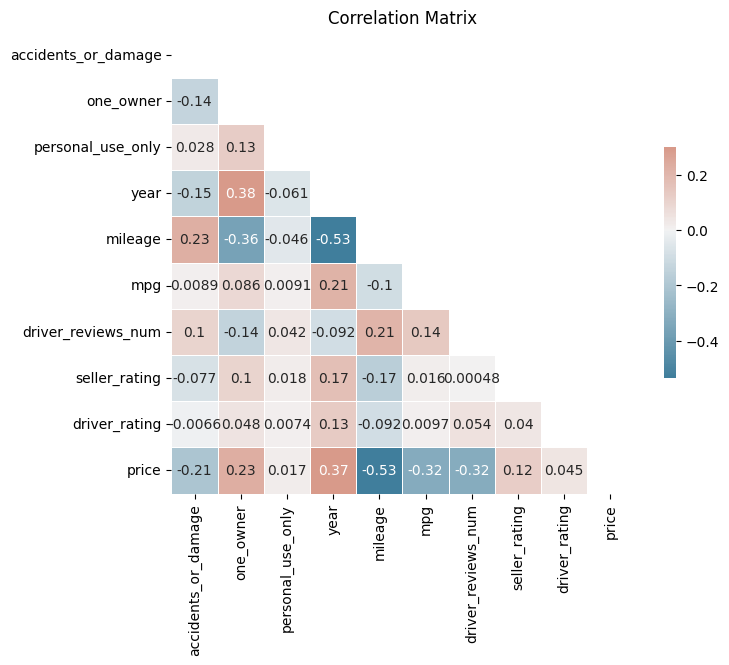

In [14]:
# Compute the correlation matrix
corr = df.select_dtypes(exclude='object').corr()

# Generate a mask for the upper triangle
mask = np.triu(np.ones_like(corr, dtype=bool))

# Set up the matplotlib figure
f, ax = plt.subplots(figsize=(8, 6))

# Generate a custom diverging colormap
cmap = sns.diverging_palette(230, 20, as_cmap=True)

# Draw the heatmap with the mask and correct aspect ratio
sns.heatmap(corr, mask=mask, cmap=cmap, vmax=.3, center=0,
            square=True, linewidths=.5, cbar_kws={"shrink": .5}, annot=True)

plt.title("Correlation Matrix")

plt.show()

### Explore the categorical features

Now, we can explore the categorical features. First check the first values of each category

### Explore other features

## Frist Model

* Transformation of some columns
* Simple model baseline
* Hyperparameter tunning
* Split train-test
* Metrics